In [3]:
#import library
import xarray as xr
import netCDF4
import cartopy
import cftime
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pyproj

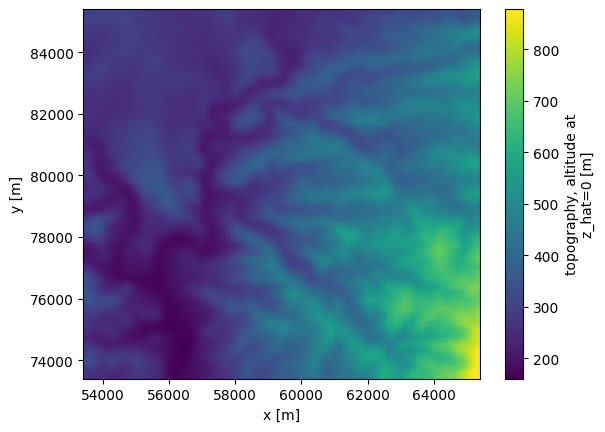

In [23]:


fileinput = '/data/IMFSE/PythonCourse/MNH/FCAST_model3.nc'
ds = xr.open_dataset(fileinput, decode_times=False)
# Extract the time variable
time_var = ds["time"]

# Get the time units, and remove the non-standard prefix
units = time_var.attrs['units'].replace('fire ignition: ', '')

# Convert the time variable using cftime
times = cftime.num2date(time_var.values, units=units, calendar='standard')

# Convert to pandas datetime if needed
times_as_datetime = [datetime(year=t.year, month=t.month, day=t.day, 
                              hour=t.hour, minute=t.minute, second=t.second,microsecond=t.microsecond)
                     for t in times]


# Replace the time variable in the dataset with the converted times
ds["time"] = ("time", times_as_datetime)
#now for example to print the topography you can use
ds['topography'].plot()

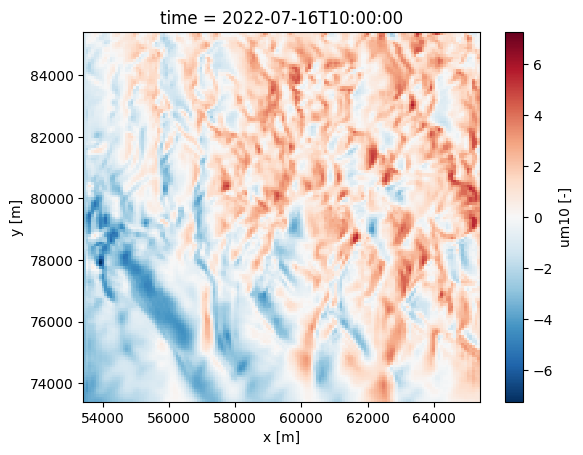

In [5]:
ds['um10'][10].plot()

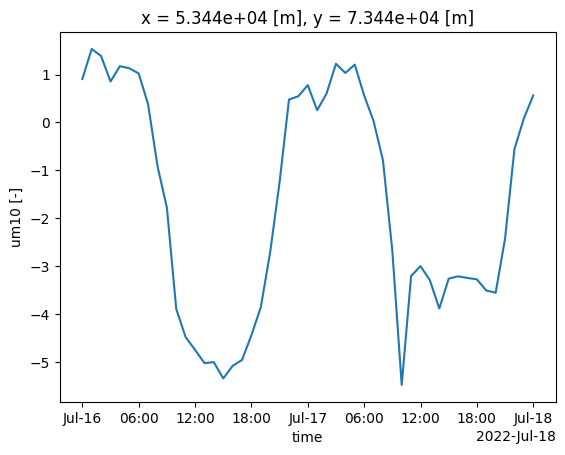

In [6]:
ds.isel(x=0,y=0)['um10'].plot()

In [7]:
lat = ds['lat'].values[:,0]
lat

array([41.65203617, 41.65275838, 41.65348059, 41.65420279, 41.65492498,
       41.65564716, 41.65636933, 41.6570915 , 41.65781365, 41.6585358 ,
       41.65925795, 41.65998008, 41.6607022 , 41.66142432, 41.66214643,
       41.66286853, 41.66359062, 41.66431271, 41.66503479, 41.66575685,
       41.66647891, 41.66720097, 41.66792301, 41.66864505, 41.66936707,
       41.67008909, 41.67081111, 41.67153311, 41.67225511, 41.67297709,
       41.67369907, 41.67442104, 41.67514301, 41.67586496, 41.67658691,
       41.67730885, 41.67803078, 41.6787527 , 41.67947462, 41.68019652,
       41.68091842, 41.68164031, 41.68236219, 41.68308407, 41.68380593,
       41.68452779, 41.68524964, 41.68597148, 41.68669332, 41.68741514,
       41.68813696, 41.68885877, 41.68958057, 41.69030236, 41.69102415,
       41.69174593, 41.6924677 , 41.69318946, 41.69391121, 41.69463295,
       41.69535469, 41.69607642, 41.69679814, 41.69751985, 41.69824155,
       41.69896325, 41.69968494, 41.70040662, 41.70112829, 41.70

In [8]:
lon = ds['lon'].values[0,:]
lon

array([1.82585565, 1.82682223, 1.8277888 , 1.82875537, 1.82972194,
       1.83068852, 1.83165509, 1.83262166, 1.83358824, 1.83455481,
       1.83552138, 1.83648796, 1.83745453, 1.8384211 , 1.83938767,
       1.84035425, 1.84132082, 1.84228739, 1.84325397, 1.84422054,
       1.84518711, 1.84615369, 1.84712026, 1.84808683, 1.8490534 ,
       1.85001998, 1.85098655, 1.85195312, 1.8529197 , 1.85388627,
       1.85485284, 1.85581942, 1.85678599, 1.85775256, 1.85871913,
       1.85968571, 1.86065228, 1.86161885, 1.86258543, 1.863552  ,
       1.86451857, 1.86548514, 1.86645172, 1.86741829, 1.86838486,
       1.86935144, 1.87031801, 1.87128458, 1.87225116, 1.87321773,
       1.8741843 , 1.87515087, 1.87611745, 1.87708402, 1.87805059,
       1.87901717, 1.87998374, 1.88095031, 1.88191689, 1.88288346,
       1.88385003, 1.8848166 , 1.88578318, 1.88674975, 1.88771632,
       1.8886829 , 1.88964947, 1.89061604, 1.89158262, 1.89254919,
       1.89351576, 1.89448233, 1.89544891, 1.89641548, 1.89738

In [19]:
ds

<xarray.Dataset> Size: 7GB
Dimensions:       (x: 150, y: 150, z: 50, time: 49)
Coordinates:
  * x             (x) float32 600B 5.344e+04 5.352e+04 ... 6.528e+04 6.536e+04
  * y             (y) float32 600B 7.344e+04 7.352e+04 ... 8.528e+04 8.536e+04
  * z             (z) float32 200B 15.0 46.5 81.15 ... 1.736e+04 1.826e+04
  * time          (time) datetime64[ns] 392B 2022-07-16 ... 2022-07-18
Data variables: (12/31)
    lat           (y, x) float64 180kB 41.65 41.65 41.65 ... 41.76 41.76 41.76
    lon           (y, x) float64 180kB 1.826 1.827 1.828 ... 1.968 1.969 1.97
    dx            (z, y, x) float64 9MB ...
    dy            (z, y, x) float64 9MB ...
    dz            (z, y, x) float64 9MB ...
    topography    (y, x) float64 180kB ...
    ...            ...
    vm10          (time, y, x) float64 9MB ...
    gust10        (time, y, x) float64 9MB ...
    lambda2       (time, z, y, x) float64 441MB ...
    acprecip      (time, z, y, x) float64 441MB ...
    cloudfrac     (time, z, y, x) float64 441MB ...
    t2m           (time, y, x) float64 9MB ...
Attributes:
    description:  MNH Output for simulation FCAST and model3
    created:      R. Paugam
    company:      DoWeNeedOne
    title:        MNH Output

In [12]:

# Coordinates of the weather stations
wslat = 41.83094
wslon = 1.84699

# Calculate the absolute differences between the werather stations coordinates and the grid points
idx_lat = np.abs(lat - wslat).argmin()
idx_lon = np.abs(lon - wslon).argmin()

In [13]:
idx_lat, idx_lon

(149, 22)

In [49]:
ds.isel(x=22,y=149)[['um10','vm10','t2m','gust10']].to_dataframe()

,um10,vm10,t2m,gust10,x,y
time,,,,,,
2022-07-16 00:00:00,0.284463,-0.454374,1.000000e+20,0.936074,55200.0,85360.0
2022-07-16 01:00:00,-0.657117,-0.278774,1.000000e+20,1.113805,55200.0,85360.0
2022-07-16 02:00:00,-0.252196,-0.282423,1.000000e+20,0.778636,55200.0,85360.0
2022-07-16 03:00:00,-0.507731,-0.888757,1.000000e+20,1.423562,55200.0,85360.0
2022-07-16 04:00:00,-0.693409,-0.248774,1.000000e+20,1.192280,55200.0,85360.0
2022-07-16 05:00:00,0.270433,-0.094160,1.000000e+20,0.717645,55200.0,85360.0
2022-07-16 06:00:00,-0.117394,0.086022,1.000000e+20,0.742919,55200.0,85360.0
2022-07-16 07:00:00,-0.454005,0.059391,1.000000e+20,1.747353,55200.0,85360.0
2022-07-16 08:00:00,-0.597392,-0.165096,1.000000e+20,2.437446,55200.0,85360.0


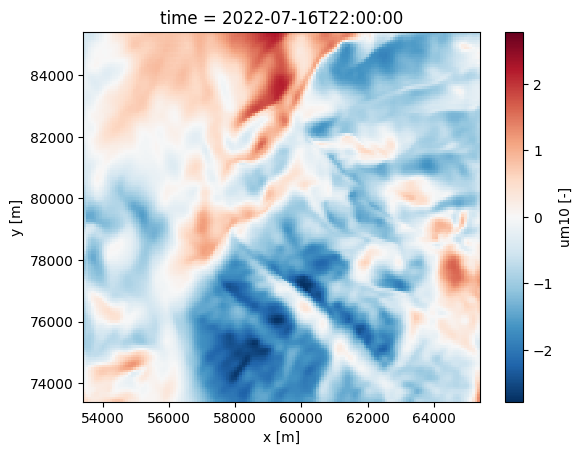

In [25]:
ds['um10'][2].plot()

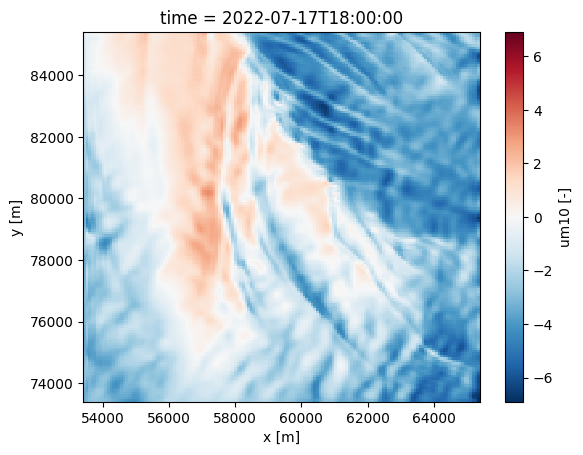

In [28]:
ds['um10'][42].plot()